## Trabajo Practico 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [5]:
os.chdir("/Users/matildecuenya/Library/Mobile Documents/com~apple~CloudDocs/Downloads/U. San Andres/2025/SEGUNDO CUATRIMESTRE/Ciencia de datos/TP 1")

# PARTE 1: Familiarizandonos con la base EPH y limpieza

Cargamos las bases, elegimos la region PAMPEANA y las unimos

In [50]:
# === 1. Cargar las bases ===
df_2005 = pd.read_stata("Individual_t105.dta")
df_2025 = pd.read_excel("usu_individual_T125.xlsx")

In [52]:
# === 2. Homogeneizar nombres de columnas ===
df_2005.columns = df_2005.columns.str.upper()
df_2025.columns = df_2025.columns.str.upper()

In [53]:
# === 3. Filtrar solo Región Pampeana ===
df_2005_pampeana = df_2005[df_2005["REGION"] == "Pampeana"].copy()
df_2025_pampeana = df_2025[df_2025["REGION"] == "43"].copy()


In [54]:
# === 4. Agregar variable de año ===
df_2005_pampeana["ANO4"] = 2005
df_2025_pampeana["ANO4"] = 2025

In [60]:
# === 5. Unir en una sola base ===
df_final = pd.concat([df_2005_pampeana, df_2025_pampeana], ignore_index=True)

/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_8500/4070911004.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_2005_pampeana, df_2025_pampeana], ignore_index=True)
/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_8500/4070911004.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_2005_pampeana, df_2025_pampeana], ignore_index=True)
/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_8500/4070911004.py:2: FutureWar

Elegimos las variables de interes, remplazamos los datos faltantes por Nan para ambos años y hacemos el heatmap

In [78]:
# --- 6. Variables de interés ---
# Lista completa de variables que deben estar en ambas bases
variables_interes = [
    "CH04", "CH06", "CH07", "CH08", "NIVEL_ED",
    "ESTADO", "CAT_INAC", "IPCF",
    "PONDERA", "AGLOMERADO", "REGION", "CH10", "CH09",
    "ITF", "PP04G"
]

In [79]:
# === 7. Unir las bases asegurando que todas las columnas de interés existan ===
# Asegurar que todas las variables de interés estén en ambas bases de datos
for col in variables_interes:
    if col not in df_2005.columns:
        df_2005[col] = np.nan
    if col not in df_2025.columns:
        df_2025[col] = np.nan

In [80]:
# --- 8. Seleccionar solo variables de interés + ANO4 ---
cols_existentes = [v for v in variables_interes if v in df_final.columns]
df_vars = df_final[cols_existentes + ["ANO4"]].copy()


In [90]:
# --- 9. Reemplazar ceros y strings vacíos por NaN ---
mask_2005 = df_vars["ANO4"] == 2005
df_vars.loc[mask_2005, cols_existentes] = df_vars.loc[mask_2005, cols_existentes].replace([0,"0","Ns/Nr"], np.nan)
mask_2025 = df_vars["ANO4"] == 2025
df_vars.loc[mask_2025, cols_existentes] = df_vars.loc[mask_2025, cols_existentes].replace(["", " ", 9, 99], np.nan)

/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_8500/769088593.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vars.loc[mask_2025, cols_existentes] = df_vars.loc[mask_2025, cols_existentes].replace(["", " ", 9, 99], np.nan)


In [91]:
# --- 10. Crear tablas de valores faltantes ---
faltantes_2005 = df_vars[df_vars["ANO4"] == 2005][cols_existentes].isna().sum()
faltantes_2025 = df_vars[df_vars["ANO4"] == 2025][cols_existentes].isna().sum()

# Mostrar tablas en pantalla
print("Valores faltantes en 2005:")
print(faltantes_2005)
print("\nValores faltantes en 2025:")
print(faltantes_2025)

Valores faltantes en 2005:
CH04             0
CH06             0
CH07             0
CH08             0
NIVEL_ED         0
ESTADO           0
CAT_INAC      6514
IPCF           170
PONDERA          0
AGLOMERADO       0
REGION           0
CH10           412
CH09             0
ITF            170
PP04G         9343
dtype: int64

Valores faltantes en 2025:
CH04             0
CH06           201
CH07             0
CH08             8
NIVEL_ED         0
ESTADO           0
CAT_INAC         0
IPCF             0
PONDERA         63
AGLOMERADO       0
REGION           0
CH10             0
CH09             0
ITF              0
PP04G         7950
dtype: int64


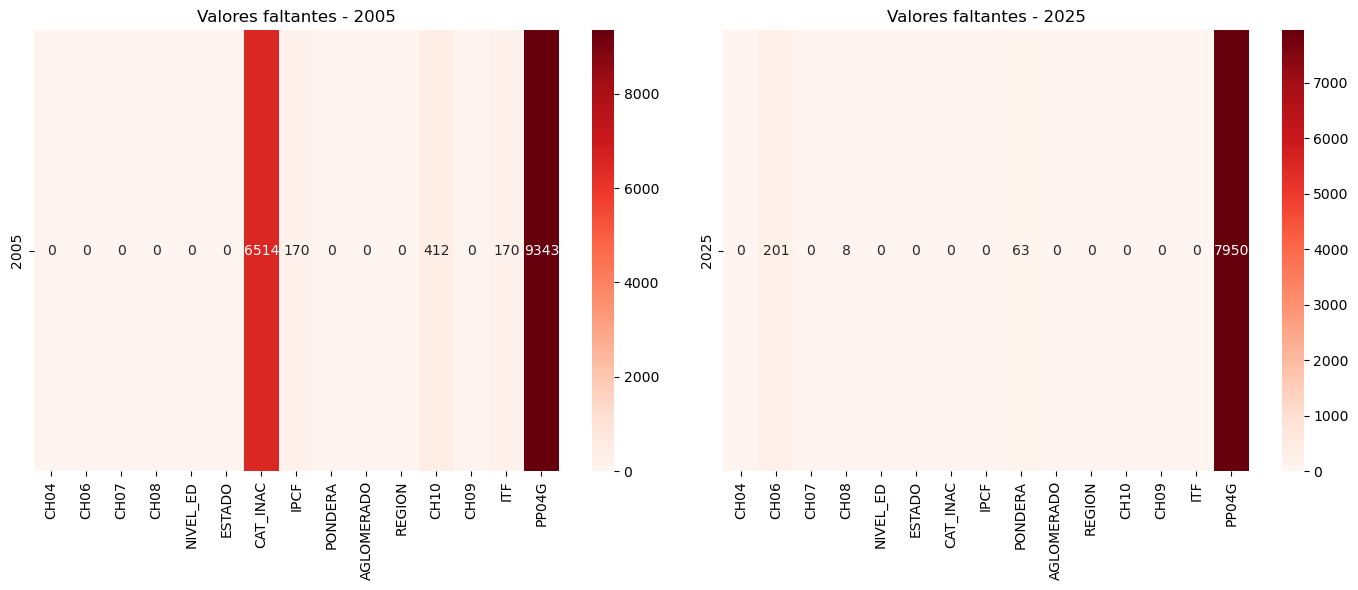

In [92]:
# --- 11. Graficar heatmap ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap([faltantes_2005.values], annot=True, fmt="d",
            xticklabels=faltantes_2005.index, yticklabels=["2005"], cmap="Reds", ax=axes[0])
axes[0].set_title("Valores faltantes - 2005")

sns.heatmap([faltantes_2025.values], annot=True, fmt="d",
            xticklabels=faltantes_2025.index, yticklabels=["2025"], cmap="Reds", ax=axes[1])
axes[1].set_title("Valores faltantes - 2025")

plt.tight_layout()
plt.show()

## Estadistica Descriptiva
Para identificar los datos atipicos, hacemos estadistica descriptiva

In [83]:
# === 1. Análisis Descriptivo para 2005 ===
print("--- Análisis Descriptivo para el año 2005 ---")
df_2005_vars = df_2005.loc[:, df_2005.columns.isin(variables_interes)].copy()

# Variables numéricas
variables_numericas_2005 = ["CH06", "CH08", "IPCF", "PONDERA", "ITF"]
print("\nEstadísticas para variables numéricas (2005):")
print(df_2005_vars[variables_numericas_2005].describe(include='all'))

# Variables categóricas
variables_categoricas_2005 = ["CH04", "CH07", "NIVEL_ED", "ESTADO", "CAT_INAC", "REGION", "CH10", "CH09", "PP04G"]
print("\nConteo de valores para variables categóricas (2005):")
for var in variables_categoricas_2005:
    if var in df_2005_vars.columns:
        print(f"\n--- Variable: {var} ---")
        print(df_2005_vars[var].value_counts(dropna=False))

# === 2. Análisis Descriptivo para 2025 ===
print("\n\n--- Análisis Descriptivo para el año 2025 ---")
df_2025_vars = df_2025.loc[:, df_2025.columns.isin(variables_interes)].copy()

# Variables numéricas
variables_numericas_2025 = ["CH06", "CH08", "IPCF", "PONDERA", "ITF"]
print("\nEstadísticas para variables numéricas (2025):")
print(df_2025_vars[variables_numericas_2025].describe(include='all'))

# Variables categóricas
variables_categoricas_2025 = ["CH04", "CH07", "NIVEL_ED", "ESTADO", "CAT_INAC", "REGION", "CH10", "CH09", "PP04G"]
print("\nConteo de valores para variables categóricas (2025):")
for var in variables_categoricas_2025:
    if var in df_2025_vars.columns:
        print(f"\n--- Variable: {var} ---")
        print(df_2025_vars[var].value_counts(dropna=False))

--- Análisis Descriptivo para el año 2005 ---

Estadísticas para variables numéricas (2005):
           CH06                        CH08          IPCF       PONDERA  \
count   47030.0                       47030  47030.000000  47030.000000   
unique     99.0                           9           NaN           NaN   
top        18.0  Obra social (incluye PAMI)           NaN           NaN   
freq      924.0                       22706           NaN           NaN   
mean        NaN                         NaN    358.693196    494.545822   
std         NaN                         NaN    443.049207    466.800727   
min         NaN                         NaN      0.000000     35.000000   
25%         NaN                         NaN    125.000000    199.000000   
50%         NaN                         NaN    236.250000    298.000000   
75%         NaN                         NaN    442.375000    538.000000   
max         NaN                         NaN  13012.500000   5707.000000   

      

Limpieza de datos

In [95]:
def _to_int(series):
    """Convierte a int donde se pueda, dejando NaN cuando no."""
    out = pd.to_numeric(series, errors="coerce")
    # si alguna columna era float pero debería ser int, no forzamos int para no perder los NaN
    return out

def _clean_by_set(df, col, valid_set, cast_numeric=True, verbose=True):
    """Deja NaN cuando el valor no está en el conjunto válido."""
    if col not in df.columns:
        if verbose: print(f"[Aviso] Columna {col} no encontrada. Se omite.")
        return df
    s = df[col]
    if cast_numeric:
        s = _to_int(s)
    mask_valid = s.isin(valid_set)
    df[col] = s.where(mask_valid, np.nan)
    return df

def _clean_positive_integer(df, col, verbose=True):
    """Mantiene enteros > 0, el resto a NaN."""
    if col not in df.columns:
        if verbose: print(f"[Aviso] Columna {col} no encontrada. Se omite.")
        return df
    s = pd.to_numeric(df[col], errors="coerce")
    # válido: entero positivo
    ok = (s.notna()) & (s > 0) & (np.floor(s) == s)
    df[col] = s.where(ok, np.nan)
    return df

def _clean_non_negative_number(df, col, verbose=True):
    """Mantiene números >= 0, el resto a NaN."""
    if col not in df.columns:
        if verbose: print(f"[Aviso] Columna {col} no encontrada. Se omite.")
        return df
    s = pd.to_numeric(df[col], errors="coerce")
    df[col] = s.where(s >= 0, np.nan)
    return df

# -----------------------------
# Limpieza principal
# -----------------------------
def limpiar_df_vars(df_vars, verbose=True):
    """
    Limpia rangos/códigos fuera de lo válido para las variables EPH pedidas.
    Devuelve un DataFrame NUEVO (no modifica el original).
    """
    df = df_vars.copy()

    # --- CH04: sexo (1 varón, 2 mujer). A veces llega 'Varón'/'Mujer' en 2005 ---
    if "CH04" in df.columns:
        # normalizo strings comunes
        map_sexo = {
            "varon": 1, "varón": 1, "hombre": 1, "m": 1,
            "mujer": 2, "f": 2
        }
        s = df["CH04"].astype(str).str.strip().str.lower()
        # si ya es dígito, la dejo; si es texto mapeable, lo convierto
        s_num = pd.to_numeric(df["CH04"], errors="coerce")
        s_map = s.map(map_sexo)
        df["CH04"] = s_num.fillna(s_map)
        df = _clean_by_set(df, "CH04", valid_set={1, 2}, cast_numeric=True, verbose=verbose)

    # --- CH06: edad (0 a 120 plausible) ---
    if "CH06" in df.columns:
        s = pd.to_numeric(df["CH06"], errors="coerce")
        ok = (s >= 0) & (s <= 120)
        df["CH06"] = s.where(ok, np.nan)

    # --- CH07: estado conyugal (1..5) ---
    df = _clean_by_set(df, "CH07", valid_set={1, 2, 3, 4, 5}, cast_numeric=True, verbose=verbose)

    # --- CH08: cobertura médica; válidos individuales y combinados ---
    # admitimos: 1,2,3,4,9,12,13,23,123
    if "CH08" in df.columns:
        s_raw = df["CH08"].astype(str).str.replace(r"\s+", "", regex=True)
        # intento convertir a número (12, 123 etc.). Si falla, NaN
        s_num = pd.to_numeric(s_raw, errors="coerce")
        valid_ch08 = {1, 2, 3, 4, 9, 12, 13, 23, 123}
        df["CH08"] = s_num.where(s_num.isin(valid_ch08), np.nan)

    # --- NIVEL_ED: {1..7, 9} ---
    df = _clean_by_set(df, "NIVEL_ED", valid_set={1, 2, 3, 4, 5, 6, 7, 9}, cast_numeric=True, verbose=verbose)

    # --- ESTADO: {0..4} y chequeo simple de "menor de 10 años" ---
    if "ESTADO" in df.columns:
        df = _clean_by_set(df, "ESTADO", valid_set={0, 1, 2, 3, 4}, cast_numeric=True, verbose=verbose)
        # si hay edad y ESTADO==4 (menor de 10) pero CH06 >= 10, lo marco como NaN
        if "CH06" in df.columns:
            mask_incoh = (df["ESTADO"] == 4) & (pd.to_numeric(df["CH06"], errors="coerce") >= 10)
            df.loc[mask_incoh, "ESTADO"] = np.nan

    # --- CAT_INAC: {1..7}; solo debe estar si ESTADO==3 ---
    if "CAT_INAC" in df.columns:
        df = _clean_by_set(df, "CAT_INAC", valid_set={1, 2, 3, 4, 5, 6, 7}, cast_numeric=True, verbose=verbose)
        if "ESTADO" in df.columns:
            mask_out = df["ESTADO"] != 3
            df.loc[mask_out, "CAT_INAC"] = np.nan

    # --- IPCF e ITF: montos >= 0 ---
    df = _clean_non_negative_number(df, "IPCF", verbose=verbose)
    df = _clean_non_negative_number(df, "ITF", verbose=verbose)

    # --- PONDERA: entero positivo ---
    df = _clean_positive_integer(df, "PONDERA", verbose=verbose)

    # --- AGLOMERADO: lista cerrada (2025). Aceptamos numérico sin ceros a la izquierda. ---
    if "AGLOMERADO" in df.columns:
        valid_aglo = {
            2,3,4,5,6,7,8,9,10,12,13,14,15,17,18,19,20,22,23,25,26,27,29,30,31,32,33,34,36,38,91,93
        }
        s = pd.to_numeric(df["AGLOMERADO"], errors="coerce")
        df["AGLOMERADO"] = s.where(s.isin(valid_aglo), np.nan)

    # --- REGION: {1(GBA),40,41,42,43,44}. Aceptamos '01' -> 1 ---
    if "REGION" in df.columns:
        s = pd.to_numeric(df["REGION"], errors="coerce")
        valid_region = {1, 40, 41, 42, 43, 44}
        df["REGION"] = s.where(s.isin(valid_region), np.nan)

    # --- CH03: parentesco (1..10) ---
    df = _clean_by_set(df, "CH03", valid_set=set(range(1, 11)), cast_numeric=True, verbose=verbose)

    # --- CH05: fecha de nacimiento (fecha válida, no futura respecto a ANO4 si está) ---
    if "CH05" in df.columns:
        # intento parsear fechas
        born = pd.to_datetime(df["CH05"], errors="coerce", dayfirst=True, infer_datetime_format=True)
        # descarto absurdas (antes de 1900) o NaT
        born = born.where((born.notna()) & (born.dt.year >= 1900), pd.NaT)
        # si tenemos ANO4, exijo born.year <= ANO4
        if "ANO4" in df.columns:
            ano = pd.to_numeric(df["ANO4"], errors="coerce")
            mask_future = (born.notna()) & (ano.notna()) & (born.dt.year > ano)
            born = born.where(~mask_future, pd.NaT)
        df["CH05"] = born

    # --- CH14: último año aprobado {00..09, 98, 99} ---
    if "CH14" in df.columns:
        # aceptar strings como '00', '01', etc.
        s = df["CH14"].astype(str).str.strip()
        # paso a número, pero mantengo 00..09 como 0..9
        s_num = pd.to_numeric(s, errors="coerce")
        valid_ch14 = set(range(0, 10)) | {98, 99}
        df["CH14"] = s_num.where(s_num.isin(valid_ch14), np.nan)

    # --- PP04G: lugar de trabajo (2005 vs 2025)
    # Si hay ANO4, aplico reglas por año: 2005 -> {1..10}; 2025 -> {2..10,11,12,13}.
    if "PP04G" in df.columns:
        s = pd.to_numeric(df["PP04G"], errors="coerce")
        if "ANO4" in df.columns:
            ano = pd.to_numeric(df["ANO4"], errors="coerce")
            valid_2005 = set(range(1, 11))
            valid_2025 = {2,3,4,5,6,7,8,9,10,11,12,13}
            # inicializo como NaN
            cleaned = pd.Series(np.nan, index=df.index, dtype="float")
            mask_2005 = ano == 2005
            mask_2025 = ano == 2025
            cleaned[mask_2005] = s[mask_2005].where(s[mask_2005].isin(valid_2005), np.nan)
            cleaned[mask_2025] = s[mask_2025].where(s[mask_2025].isin(valid_2025), np.nan)
            # para otros años (si hubiera), acepto ambos sets
            mask_otros = ~(mask_2005 | mask_2025)
            cleaned[mask_otros] = s[mask_otros].where(s[mask_otros].isin(valid_2005 | valid_2025), np.nan)
            df["PP04G"] = cleaned
        else:
            # si no hay ANO4, acepto la unión de ambos para no tirar datos válidos
            valid_all = set(range(1, 11)) | {11, 12, 13}
            df["PP04G"] = s.where(s.isin(valid_all), np.nan)

    if verbose:
        print("✔ Limpieza básica aplicada. Devolviendo DataFrame limpio.")

    return df

# -----------------------------
# USO:
df_limpio = limpiar_df_vars(df_vars)
# -----------------------------

df_limpio.head

[Aviso] Columna CH03 no encontrada. Se omite.
✔ Limpieza básica aplicada. Devolviendo DataFrame limpio.


<bound method NDFrame.head of        CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC       IPCF  PONDERA  \
0       1.0  28.0   NaN   NaN       NaN     NaN       NaN      280.0    377.0   
1       2.0  30.0   NaN   NaN       NaN     NaN       NaN      280.0    377.0   
2       1.0   4.0   NaN   NaN       NaN     NaN       NaN      280.0    377.0   
3       1.0  66.0   NaN   NaN       NaN     NaN       NaN     1075.0    283.0   
4       2.0  60.0   NaN   NaN       NaN     NaN       NaN     1075.0    283.0   
...     ...   ...   ...   ...       ...     ...       ...        ...      ...   
28449   1.0  13.0   5.0   1.0       3.0     3.0       3.0   616000.0    773.0   
28450   1.0   NaN   5.0   1.0       1.0     4.0       NaN   616000.0    773.0   
28451   1.0  24.0   5.0   1.0       5.0     1.0       NaN  1700000.0    719.0   
28452   2.0  41.0   3.0   1.0       4.0     1.0       NaN  1600000.0    519.0   
28453   2.0  21.0   5.0   1.0       6.0     1.0       NaN  1600000.0    519.0  

In [35]:
df_vars_limpio

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,AGLOMERADO,REGION,CH03,CH11,ITF,PP04G,ANO4
14651,Mujer,25,1,4.0,4,1,0,205600.0,927.0,4,43,2,0,1028000.0,11.0,2025
14655,Mujer,29,5,4.0,5,1,0,230000.0,1294.0,4,43,1,1,690000.0,12.0,2025
14658,Mujer,39,1,1.0,6,1,0,350000.0,727.0,4,43,1,0,1050000.0,11.0,2025
14659,Varón,41,1,1.0,3,1,0,350000.0,727.0,4,43,2,0,1050000.0,9.0,2025
14661,Mujer,51,5,2.0,3,1,0,0.0,656.0,4,43,1,0,0.0,8.0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28447,Mujer,40,1,1.0,5,1,0,616000.0,773.0,13,43,3,0,3080000.0,11.0,2025
28448,Varón,41,1,1.0,4,1,0,616000.0,773.0,13,43,4,0,3080000.0,11.0,2025
28451,Varón,24,5,1.0,5,1,0,1700000.0,719.0,13,43,1,1,1700000.0,11.0,2025
28452,Mujer,41,3,1.0,4,1,0,1600000.0,519.0,13,43,1,0,4800000.0,8.0,2025


# PARTE 2: Primer Análisis Exploratorio

## Grafico de barras
Composición por sexo para 2005 y 2025 en la región Pampeana.

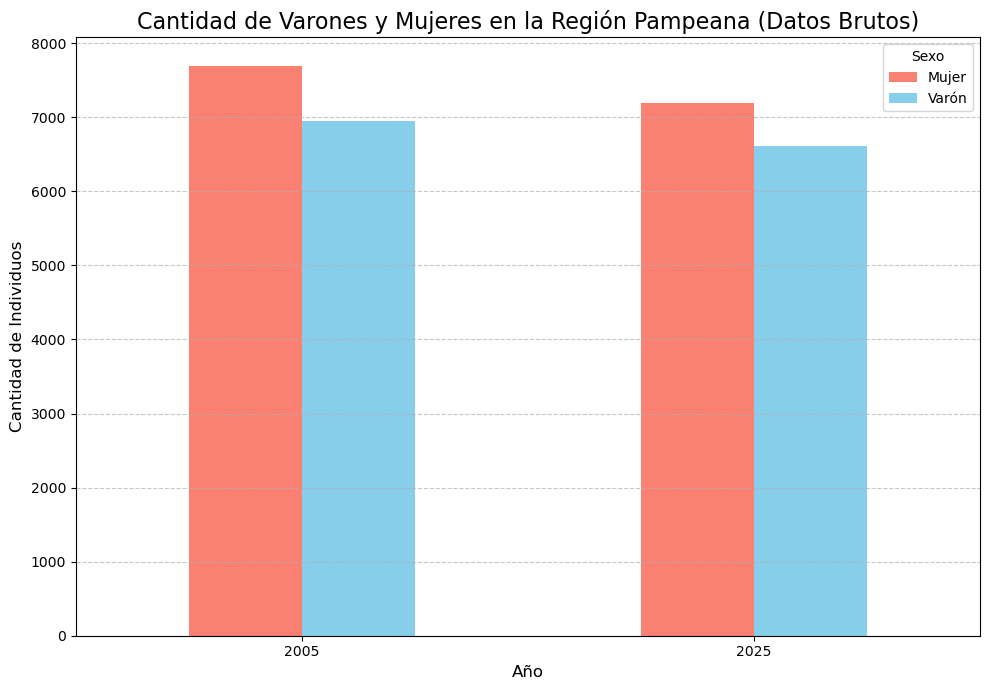

In [96]:
#Homogeneizar valores y limpiar la variable de sexo ---
# Mapear los valores de 2025 a strings
df_limpio["CH04"] = df_limpio["CH04"].replace({1: "Varón", 2: "Mujer"})

# --- 7. Calcular el conteo de mujeres y varones y graficar con la base final ---
# Contar la cantidad de individuos por año y por sexo
conteo_sexo_final = df_limpio.groupby(["ANO4", "CH04"]).size().unstack()

# Definir los colores para el gráfico
colores_sexo = {"Varón": "skyblue", "Mujer": "salmon"}

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 7))
conteo_sexo_final.plot(kind="bar", color=[colores_sexo.get(x, 'gray') for x in conteo_sexo_final.columns], ax=ax)

# Personalizar el gráfico
ax.set_title("Cantidad de Varones y Mujeres en la Región Pampeana (Datos Brutos)", fontsize=16)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Cantidad de Individuos", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title="Sexo", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()